In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 导入数据
bf = pd.read_csv("BlackFriday.csv", header = 'infer')
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
bf.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# 2.数据预处理

In [4]:
##处理缺失值
bf.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [5]:
bf.isnull()#生成的是所有数据的true／false矩阵

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,False,False,False,False,False,False,False,False,False,False,True,False
537573,False,False,False,False,False,False,False,False,False,False,False,False
537574,False,False,False,False,False,False,False,False,False,False,True,False
537575,False,False,False,False,False,False,False,False,False,True,True,False


In [6]:
bf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
bf.shape

(537577, 12)

In [9]:
#计算缺失值的比率：
missing_percentage = (bf.isnull().sum()/bf.shape[0]*100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage!=0].round(2)
missing_percentage

Product_Category_3    69.44
Product_Category_2    31.06
dtype: float64

In [11]:
#缺失值使用 0 填充
bf.fillna(0,inplace=True)
bf.isna().any().sum()

0

In [ ]:
#缺失值处理完毕

# 3.初步探索数据

In [12]:
# 哪些人群更可能在黑色星期五购买更多?
# Q1 性别：男性或女性 + Q4 婚姻状况: 结婚或者结婚  双重pie
# Q2 年龄：哪个年龄段 bar
# Q3 职业 pie
# Q5 居住时间：新居民或老居民 bar
# Q6 城市 pie

In [13]:
#3.1 查看各数据项的取值
#type(bf)
def data_type(bf):
    for i in bf.columns:
        print(i,"------>>",bf[i].unique())

In [14]:
data_type(bf)

User_ID ------>> [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID ------>> ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender ------>> ['F' 'M']
Age ------>> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation ------>> [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ------>> ['A' 'C' 'B']
Stay_In_Current_City_Years ------>> ['2' '4+' '3' '1' '0']
Marital_Status ------>> [0 1]
Product_Category_1 ------>> [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2 ------>> [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 ------>> [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase ------>> [ 8370 15200  1422 ... 14539 11120 18426]


In [ ]:
# 3.2 性别和婚姻状况
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q1 性别：男性或女性+#Q4 婚姻状况: 结婚或者结婚  双重pie

In [17]:
bf.groupby(['Gender','Marital_Status'])

In [18]:
bf.groupby(['Gender','Marital_Status']).count()

User_ID  Product_ID     Age  Occupation  City_Category  \
Gender Marital_Status                                                           
F      0                 76974       76974   76974       76974          76974   
       1                 55223       55223   55223       55223          55223   
M      0                240843      240843  240843      240843         240843   
       1                164537      164537  164537      164537         164537   

                       Stay_In_Current_City_Years  Product_Category_1  \
Gender Marital_Status                                                   
F      0                                    76974               76974   
       1                                    55223               55223   
M      0                                   240843              240843   
       1                                   164537              164537   

                       Product_Category_2  Product_Category_3  Purchase  
Gender Marital_Status                                                    
F      0                            76974               76974     76974  
       1                            55223               55223     55223  
M      0                           240843              240843    240843  
       1                           164537              164537    164537

In [19]:
bf.groupby(['Gender','Marital_Status']).count().reset_index('Marital_Status')

,Marital_Status,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,,,
F,0,76974,76974,76974,76974,76974,76974,76974,76974,76974,76974
F,1,55223,55223,55223,55223,55223,55223,55223,55223,55223,55223
M,0,240843,240843,240843,240843,240843,240843,240843,240843,240843,240843
M,1,164537,164537,164537,164537,164537,164537,164537,164537,164537,164537


In [20]:
bf.groupby(['Gender'])

In [21]:
bf.groupby(['Gender']).count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,,,
F,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197
M,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380


In [22]:
bf_gen_mar = bf.groupby(['Gender','Marital_Status']).count().reset_index('Marital_Status')
bf_gen = bf.groupby(['Gender']).count()

In [24]:
bf_gen_mar.iloc[:,2]

Gender
F     76974
F     55223
M    240843
M    164537
Name: Product_ID, dtype: int64

Text(0.5, 1, 'Gender & Marital_Status')

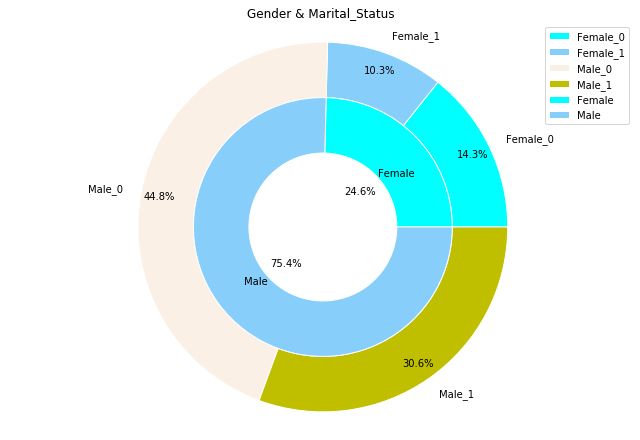

In [23]:
# Female_0,Female_1 中的 "0"代表未婚，"1"代表已婚
plt.figure(figsize=(9,6))
plt.pie(bf_gen_mar.iloc[:,2],radius=1,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','y'],labels=['Female_0','Female_1','Male_0','Male_1'],autopct='%1.1f%%',pctdistance = 0.9)
plt.pie(bf_gen.iloc[:,1],radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['Female','Male'],labeldistance = 0.6,autopct='%1.1f%%',pctdistance = 0.4)
'''
radius  :控制饼图半径，默认值为1；
wedgeprops ：字典类型，可选参数，默认值：None。参数字典传递给wedge对象用来画一个饼图。例如：wedgeprops={'linewidth':3}设置wedge线宽为3;
labeldistance :label标记的绘制位置,相对于半径的比例，默认值为1.1, 如<1则绘制在饼图内侧；
autopct :控制饼图内百分比设置,可以使用format字符串或者format function, '%1.1f'指小数点前后位数(没有用空格补齐)；
pctdistance :类似于labeldistance,指定autopct的位置刻度,默认值为0.6；
'''
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域
plt.legend()
plt.axis('equal')#该行代码使饼图长宽相等
plt.title('Gender & Marital_Status')

Text(0.5, 1, 'Gender & Marital_Status')

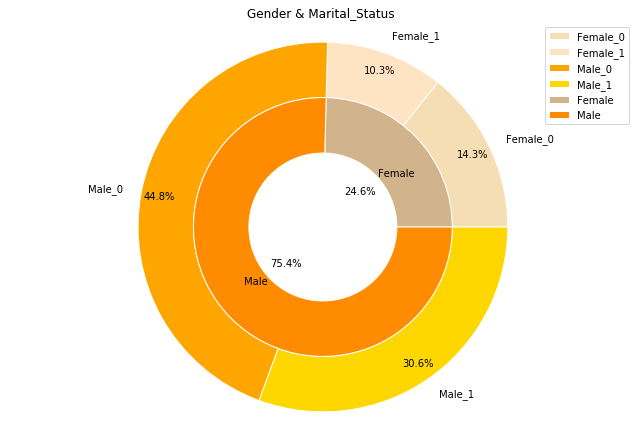

In [28]:
# Female_0,Female_1 中的 "0"代表未婚，"1"代表已婚
plt.figure(figsize=(9,6))
plt.pie(bf_gen_mar.iloc[:,2],radius=1,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['wheat','bisque','orange','gold'],labels=['Female_0','Female_1','Male_0','Male_1'],autopct='%1.1f%%',pctdistance = 0.9)
plt.pie(bf_gen.iloc[:,1],radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['tan','darkorange','linen','yellow'],labels=['Female','Male'],labeldistance = 0.6,autopct='%1.1f%%',pctdistance = 0.4)
'''
radius  :控制饼图半径，默认值为1；
wedgeprops ：字典类型，可选参数，默认值：None。参数字典传递给wedge对象用来画一个饼图。例如：wedgeprops={'linewidth':3}设置wedge线宽为3;
labeldistance :label标记的绘制位置,相对于半径的比例，默认值为1.1, 如<1则绘制在饼图内侧；
autopct :控制饼图内百分比设置,可以使用format字符串或者format function, '%1.1f'指小数点前后位数(没有用空格补齐)；
pctdistance :类似于labeldistance,指定autopct的位置刻度,默认值为0.6；
'''
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域
plt.legend()
plt.axis('equal')#该行代码使饼图长宽相等
plt.title('Gender & Marital_Status')

In [ ]:
# 可见，在黑色星期五的销量中，男性特别是未婚男性的购买次数最多。未婚的男女性购买次数相对于已婚都多。

In [ ]:
# 3.3 年龄
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q2 年龄：哪个年龄段

In [29]:
bf.groupby(['Age']).count()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,,,,,
0-17,14707,14707,14707,14707,14707,14707,14707,14707,14707,14707,14707
18-25,97634,97634,97634,97634,97634,97634,97634,97634,97634,97634,97634
26-35,214690,214690,214690,214690,214690,214690,214690,214690,214690,214690,214690
36-45,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499,107499
46-50,44526,44526,44526,44526,44526,44526,44526,44526,44526,44526,44526
51-55,37618,37618,37618,37618,37618,37618,37618,37618,37618,37618,37618
55+,20903,20903,20903,20903,20903,20903,20903,20903,20903,20903,20903


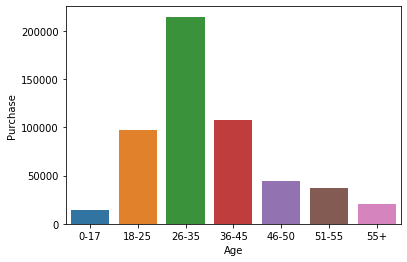

In [30]:
bf_age = bf.groupby(['Age']).count()
sns.barplot(x=bf_age.index,y=bf_age.Purchase)

In [ ]:
# 可见购买的主要群体集中于18-45岁的青中年群体，呈类似正态分布的形式，其中26-35岁的青年团体贡献最大

3.4 职业

In [31]:
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q3 职业 pie
bf.groupby(['Occupation']).count()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,,,,,,,,,,,
0,68120,68120,68120,68120,68120,68120,68120,68120,68120,68120,68120
1,45971,45971,45971,45971,45971,45971,45971,45971,45971,45971,45971
2,25845,25845,25845,25845,25845,25845,25845,25845,25845,25845,25845
3,17366,17366,17366,17366,17366,17366,17366,17366,17366,17366,17366
4,70862,70862,70862,70862,70862,70862,70862,70862,70862,70862,70862
5,11985,11985,11985,11985,11985,11985,11985,11985,11985,11985,11985
6,19822,19822,19822,19822,19822,19822,19822,19822,19822,19822,19822
7,57806,57806,57806,57806,57806,57806,57806,57806,57806,57806,57806
8,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524


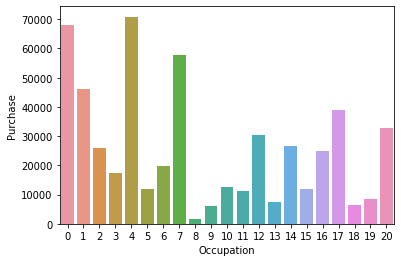

In [33]:
bf_Occ = bf.groupby(['Occupation']).count()
sns.barplot(x=bf_Occ.index,y=bf_Occ.Purchase)

In [ ]:
#可见，从事职业代号0，4，7的群体购买次数更多，且8，13，18三者最少

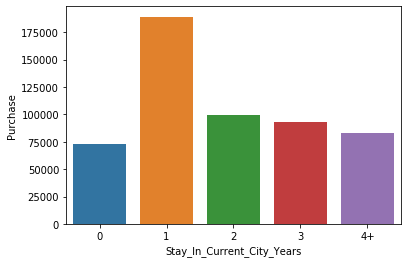

In [34]:
# 3.5 居住时间
## 初步探索数据
# 哪些人群更可能在黑色星期五购买更多?
#Q5 居住时间：新居民或老居民  bar
bf_Occ = bf.groupby(['Stay_In_Current_City_Years']).count()
sns.barplot(x=bf_Occ.index,y=bf_Occ.Purchase)

In [ ]:
# 可见，居住一年的群体购买次数更多，其余的居住时间购买次数较相近

# 4.二次探索数据

In [35]:
## 二次探索数据
# 哪种产品在黑色星期五更畅销?（top 10）
# 随着年龄的上升，各类型的产品呈怎样的趋势
# 随着居住时间的上升，各类型的产品呈怎样的趋势
# 哪种类型的产品对于男性和女性（未婚、已婚）来说，需求量更大?
# 不同城市对不同产品的需求

# 4.1 畅销产品

In [36]:
bf.groupby('Product_ID')['Purchase'].sum()

Product_ID
P00000142    12592163
P00000242     3914901
P00000342     1261383
P00000442      441173
P00000542      791219
               ...   
P0099442      2813314
P0099642        83710
P0099742       967072
P0099842       721334
P0099942        70843
Name: Purchase, Length: 3623, dtype: int64

In [37]:
bf.groupby('Product_ID')['Purchase'].sum().nlargest(10)

Product_ID
P00025442    27532426
P00110742    26382569
P00255842    24652442
P00184942    24060871
P00059442    23948299
P00112142    23882624
P00110942    23232538
P00237542    23096487
P00057642    22493690
P00010742    21865042
Name: Purchase, dtype: int64

In [38]:
bf.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values()

Product_ID
P00010742    21865042
P00057642    22493690
P00237542    23096487
P00110942    23232538
P00112142    23882624
P00059442    23948299
P00184942    24060871
P00255842    24652442
P00110742    26382569
P00025442    27532426
Name: Purchase, dtype: int64

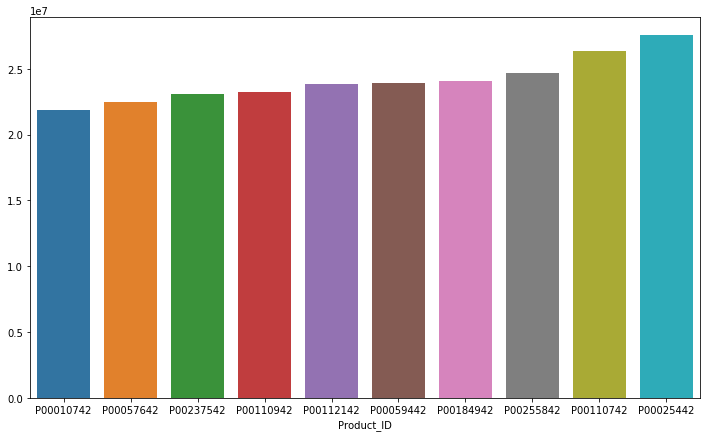

In [40]:
# 哪种产品在黑色星期五更畅销?（top 10）
fig1, ax1 = plt.subplots(figsize=(12,7))
bf_PID_top10 = bf.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values()
sns.barplot(x=bf_PID_top10.index,y=bf_PID_top10.values)

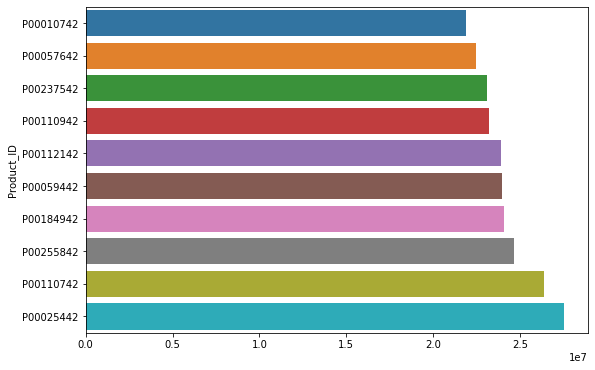

In [42]:
plt.figure(figsize=(9,6))
sns.barplot(x=bf_PID_top10.values,y=bf_PID_top10.index)

# 4.2 年龄与产品类型

In [ ]:
## 二次探索数据
##不同人群对不同产品的购买情况
# 随着年龄的上升，各类型的产品呈怎样的趋势

In [43]:
bf.groupby(['Age'])['Purchase'].sum()

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

In [44]:
bf_P2=bf[bf["Product_Category_2"]>0]
bf_P2.groupby(['Age'])['Purchase'].sum()

Age
0-17      101198786
18-25     684509923
26-35    1487693857
36-45     750195166
46-50     302667821
51-55     265097272
55+       141205619
Name: Purchase, dtype: int64

In [45]:
bf_P3=bf[bf["Product_Category_3"]>0]
bf_P3.groupby(['Age'])['Purchase'].sum()

Age
0-17      53489797
18-25    357755683
26-35    765778036
36-45    384322562
46-50    153195133
51-55    132652295
55+       68452529
Name: Purchase, dtype: int64

In [46]:
bf_P1=bf[bf["Product_Category_1"]>0]
bf_P1.groupby(['Age'])['Purchase'].sum()

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

In [48]:
bf_P1=bf[bf["Product_Category_1"]>0]
bf_P1=bf_P1.groupby(['Age'])['Purchase'].sum()
bf_P2=bf[bf["Product_Category_2"]>0]
bf_P2=bf_P2.groupby(['Age'])['Purchase'].sum()
bf_P3=bf[bf["Product_Category_3"]>0]
bf_P3=bf_P3.groupby(['Age'])['Purchase'].sum()

No handles with labels found to put in legend.


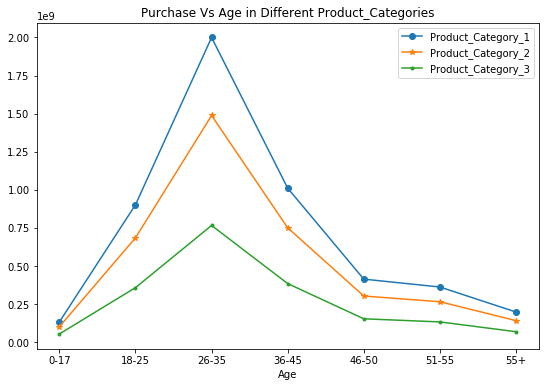

In [49]:
fig=plt.figure(figsize=(9,6));
ax=fig.add_subplot(1,1,1)
ticks=ax.set_xticklabels(['0-17','18-25', '26-35','36-45','46-50','51-55','55+'])
ax.set_title("Purchase Vs Age in Different Product_Categories")
ax.set_xlabel('Age')
ax.legend(loc='best')
ax.plot(bf_P1,marker='o')
ax.plot(bf_P2,marker='*')
ax.plot(bf_P3,marker='.')
ax.legend(['Product_Category_1','Product_Category_2','Product_Category_3'])

In [ ]:
#可见，在26岁前，随着年龄的上升，对三种产品类型的需求也上升；在35岁后，随着年龄的上升，对三种产品类型的需求也下降。
#说明这三种类型的产品的销售对象是青中年人群